In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
csv_akam = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/AKAM_Stock.csv"
df = pd.read_csv(csv_akam, thousands=',')

In [3]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1.324000e+03
mean,98.894456,98.894456,99.920030,97.838044,98.871488,1.582324e+06
std,13.155544,13.155544,13.238076,13.092423,13.186564,9.565868e+05
min,69.120003,69.120003,69.260002,67.279999,68.230003,2.774000e+05
25%,88.715000,88.715000,89.742500,87.667500,88.660004,1.043800e+06
50%,100.404999,100.404999,101.779999,99.184998,100.419998,1.350500e+06
75%,110.002501,110.002501,111.330000,108.862501,109.972502,1.799050e+06
max,128.320007,128.320007,129.169998,126.980003,128.550003,1.077170e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1324 non-null   object 
 1   Symbol     1324 non-null   object 
 2   Adj Close  1324 non-null   float64
 3   Close      1324 non-null   float64
 4   High       1324 non-null   float64
 5   Low        1324 non-null   float64
 6   Open       1324 non-null   float64
 7   Volume     1324 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.9+ KB


In [5]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [6]:
detect_outlier(df, 'Close')

Empty DataFrame
Columns: [Date, Symbol, Adj Close, Close, High, Low, Open, Volume]
Index: []


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0       71.089996
1       70.290001
2       70.550003
3       71.540001
4       70.470001
          ...    
1319    92.589996
1320    90.839996
1321    90.220001
1322    92.239998
1323    90.900002
Name: Close, Length: 1324, dtype: float64

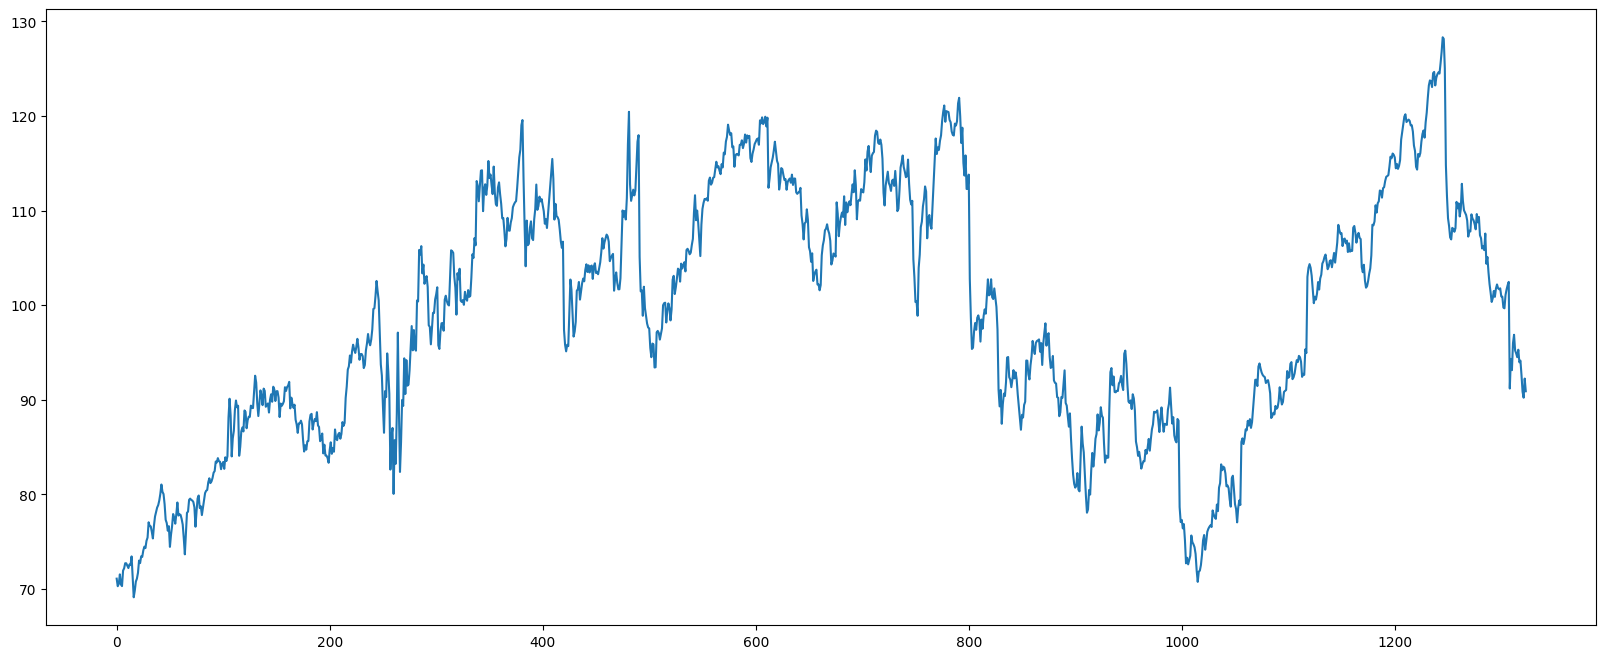

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(df1)
plt.show()

In [10]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.03327692],
       [0.01976348],
       [0.02415541],
       ...,
       [0.35641887],
       [0.39054043],
       [0.36790536]])

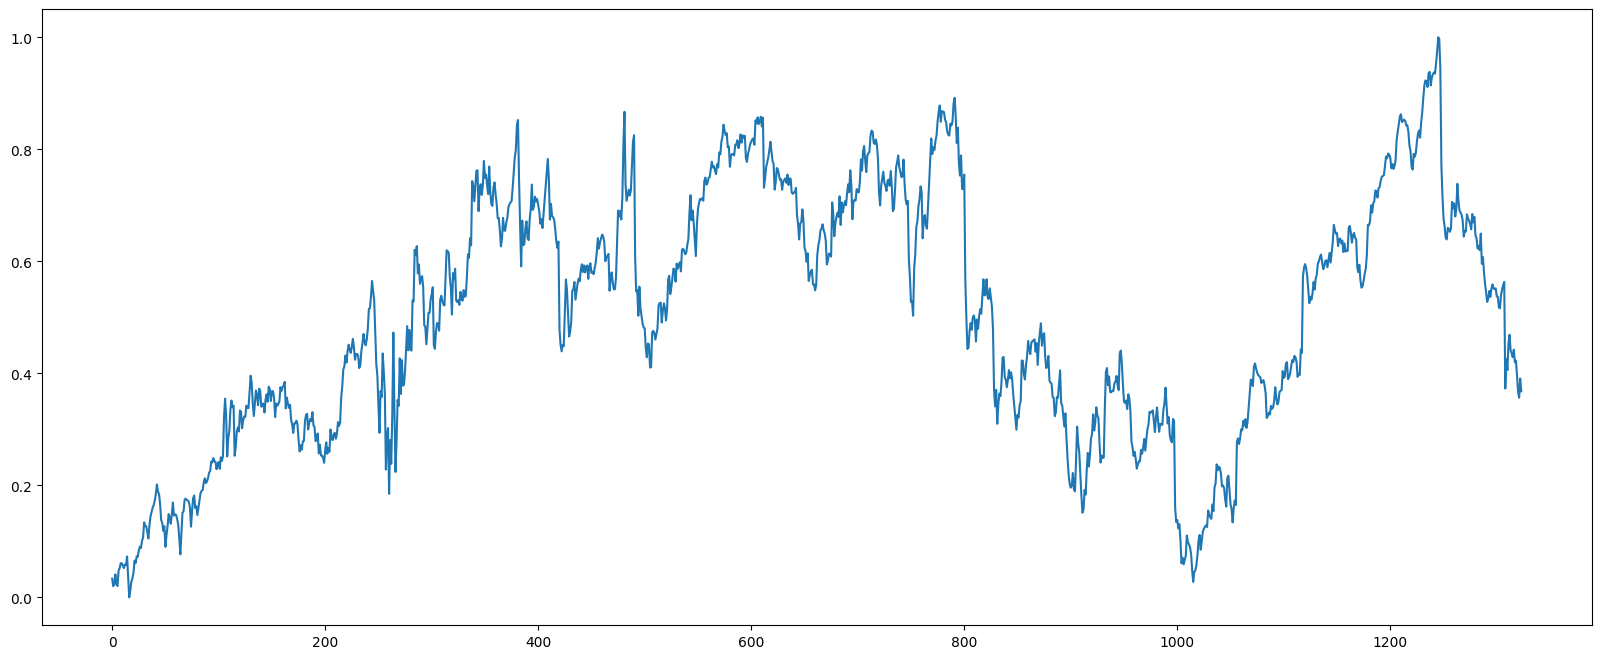

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(df1)
plt.show()

In [13]:
# 4. Chia train test
train_size = int(0.75 * len(df1))
test_size = len(df1)-train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [14]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.1535 - val_loss: 0.0317
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0184 - val_loss: 0.0077
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0092 - val_loss: 0.0066
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0064 - val_loss: 0.0071
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step

In [19]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [20]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [21]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE,MAPE, MAE
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(ytest, y_pred)
print('Testing MAPE:', test_mape)

Testing RMSE: 1.638222056196686
Testing MAE: 1.0412981422871088
Testing MAPE: 0.009904295013534589


In [22]:
# 13. Dự báo 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)

temp_input = list(x_input[0])

from numpy import array

lst_output_30=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_30.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_30.extend(yhat.tolist())
        i=i+1


[0.38727567]
101
1 day input [0.81351338 0.82736473 0.83361477 0.8207769  0.84814181 0.86537148
 0.89138501 0.91402021 0.92297289 0.92128373 0.91114849 0.93597959
 0.93817562 0.91402021 0.9277026  0.93395265 0.93733097 0.93513507
 0.95354717 0.97398634 1.         0.99712815 0.94476345 0.77162157
 0.7170607  0.67685805 0.66283775 0.64256753 0.63902012 0.65962825
 0.65793909 0.65270264 0.65912151 0.70608095 0.69459446 0.70337831
 0.68006742 0.69324321 0.73834452 0.70743233 0.69104718 0.6868242
 0.68260123 0.6728039  0.64408774 0.65456076 0.65320938 0.68378366
 0.67618236 0.67314181 0.66621608 0.65709444 0.6842904  0.66959453
 0.6792229  0.64628364 0.64121615 0.62280392 0.6270269  0.61993233
 0.64949314 0.59560797 0.6076012  0.58023642 0.55912155 0.54408778
 0.52736472 0.53395267 0.54695937 0.53648635 0.5513513  0.55861482
 0.55185803 0.54999992 0.55168908 0.537331   0.53665531 0.51722961
 0.51604718 0.53986481 0.54983096 0.55743239 0.56317557 0.37280402
 0.42567559 0.4055742  0.45371619 

In [23]:
# 13. Dự báo 60 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)

temp_input = list(x_input[0])

from numpy import array

lst_output_60=[]
n_steps=x_input.shape[1]
i=0
while(i<60):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


[0.38727567]
101
1 day input [0.81351338 0.82736473 0.83361477 0.8207769  0.84814181 0.86537148
 0.89138501 0.91402021 0.92297289 0.92128373 0.91114849 0.93597959
 0.93817562 0.91402021 0.9277026  0.93395265 0.93733097 0.93513507
 0.95354717 0.97398634 1.         0.99712815 0.94476345 0.77162157
 0.7170607  0.67685805 0.66283775 0.64256753 0.63902012 0.65962825
 0.65793909 0.65270264 0.65912151 0.70608095 0.69459446 0.70337831
 0.68006742 0.69324321 0.73834452 0.70743233 0.69104718 0.6868242
 0.68260123 0.6728039  0.64408774 0.65456076 0.65320938 0.68378366
 0.67618236 0.67314181 0.66621608 0.65709444 0.6842904  0.66959453
 0.6792229  0.64628364 0.64121615 0.62280392 0.6270269  0.61993233
 0.64949314 0.59560797 0.6076012  0.58023642 0.55912155 0.54408778
 0.52736472 0.53395267 0.54695937 0.53648635 0.5513513  0.55861482
 0.55185803 0.54999992 0.55168908 0.537331   0.53665531 0.51722961
 0.51604718 0.53986481 0.54983096 0.55743239 0.56317557 0.37280402
 0.42567559 0.4055742  0.45371619 

In [24]:
# 13. Dự báo 90 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)

temp_input = list(x_input[0])

from numpy import array

lst_output_90=[]
n_steps=x_input.shape[1]
i=0
while(i<90):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


[0.38727567]
101
1 day input [0.81351338 0.82736473 0.83361477 0.8207769  0.84814181 0.86537148
 0.89138501 0.91402021 0.92297289 0.92128373 0.91114849 0.93597959
 0.93817562 0.91402021 0.9277026  0.93395265 0.93733097 0.93513507
 0.95354717 0.97398634 1.         0.99712815 0.94476345 0.77162157
 0.7170607  0.67685805 0.66283775 0.64256753 0.63902012 0.65962825
 0.65793909 0.65270264 0.65912151 0.70608095 0.69459446 0.70337831
 0.68006742 0.69324321 0.73834452 0.70743233 0.69104718 0.6868242
 0.68260123 0.6728039  0.64408774 0.65456076 0.65320938 0.68378366
 0.67618236 0.67314181 0.66621608 0.65709444 0.6842904  0.66959453
 0.6792229  0.64628364 0.64121615 0.62280392 0.6270269  0.61993233
 0.64949314 0.59560797 0.6076012  0.58023642 0.55912155 0.54408778
 0.52736472 0.53395267 0.54695937 0.53648635 0.5513513  0.55861482
 0.55185803 0.54999992 0.55168908 0.537331   0.53665531 0.51722961
 0.51604718 0.53986481 0.54983096 0.55743239 0.56317557 0.37280402
 0.42567559 0.4055742  0.45371619 

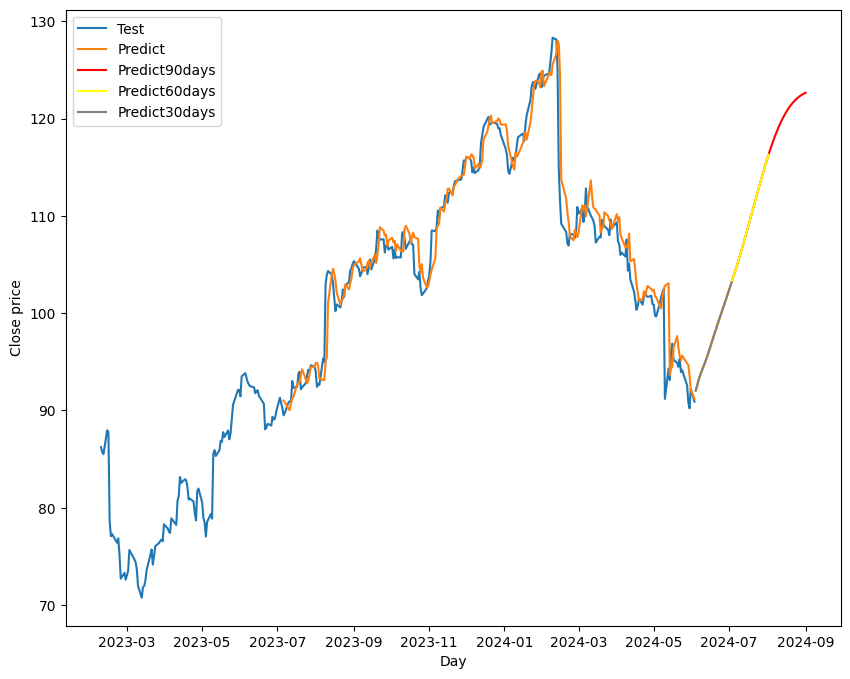

In [25]:
# 14.Vẽ hình
import matplotlib.dates as mdates
plt.figure(figsize=(10, 8))
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'][train_size:],scaler.inverse_transform(test_data))
plt.plot(df['Date'][train_size+101:],(y_pred))
predict_data_index_90 = pd.bdate_range(start=df['Date'][len(df['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=df['Date'][len(df['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=df['Date'][len(df['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90), color='red')
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60), color='yellow')
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output_30), color='grey')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test','Predict','Predict90days', 'Predict60days', 'Predict30days'])
plt.show()

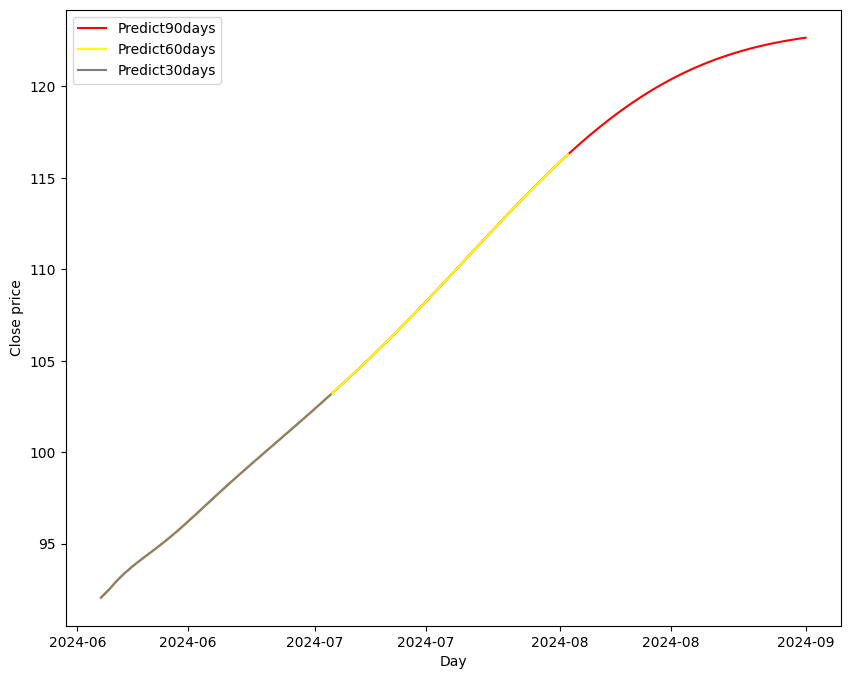

In [26]:
plt.figure(figsize=(10, 8))
df['Date'] = pd.to_datetime(df['Date'])
predict_data_index_90 = pd.bdate_range(start=df['Date'][len(df['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=df['Date'][len(df['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=df['Date'][len(df['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90), color='red')
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60), color='yellow')
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output_30), color='grey')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Predict90days', 'Predict60days', 'Predict30days'])
plt.show()